# SHOPPING TREND OF COSTUMERS

---



importing **libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [ ]:
from urllib.request import urlretrieve

### LOADING THE DATASET

In [ ]:
urlretrieve('https://docs.google.com/spreadsheets/d/1jpOdtGqOci9WPK7pwVN0MMmw1UOjH7ZN3zNcaBfTKug/edit?usp=sharing','MLCOE Task 1')

('MLCOE Task 1', <http.client.HTTPMessage at 0x7ee10bf2ba90>)

In [ ]:

file_path = '/content/MLCOE Task 1 - second_draft.csv'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")


File does not exist


In [ ]:
file_path = '/full/path/to/your/directory/MLCOE Task 1 - second_draft.csv'


In [ ]:
task_df = pd.read_csv('/content/MLCOE Task 1 - second_draft.csv')

### DATASET

In [ ]:
task_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,NaN,Male,Blouse,Clothing,NaN,Kentucky,L,Gray,Winter,NaN,yep,Credit Card,Express,Indeed,y,14,Venmo,Fortnightly
1,2,NaN,Male,Sweater,Clothing,NaN,Maine,L,Maroon,Winter,NaN,Yes,Bank Transfer,Express,Yes,Yo,2,Cash,Fortnightly
2,3,NaN,Male,Jeans,Clothing,NaN,Massachusetts,S,Maroon,Spring,NaN,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,NaN,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,NaN,Yes,PayPal,Next Day Air,Indeed,Yo,49,PayPal,Weekly
4,5,NaN,Male,Blouse,Clothing,NaN,Oregon,M,Turquoise,Spring,NaN,Yo,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40.0,Female,Hoodie,Clothing,28.0,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,Nah,32,Venmo,Weekly
3896,3897,52.0,Female,Backpack,Accessories,49.0,Iowa,L,White,Spring,4.5,ille,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46.0,Female,Belt,Accessories,33.0,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,n,No,24,Venmo,Quarterly
3898,3899,44.0,Female,Shoes,Footwear,77.0,Minnesota,S,Brown,Summer,3.8,N,PayPal,Express,Nakko,No,24,Venmo,Weekly


The dataset consists of a raw data of purchasing,shipping and review data of various people and contains 3900 rows and 19 columns of such information.

### SHAPE OF DATASET

In [ ]:
task_df.shape

(3900, 19)

the given dataset contains 3900 rows and 19 columns

### NAME OF COLUMN IN A DATASET

In [ ]:
task_df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

DATA CLEANING AND PREPROCESSING

### INFORMATION OF DATASET

In [ ]:
task_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3269 non-null   float64
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3285 non-null   float64
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3246 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
task_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3269.000000,3285.000000,3246.000000,3900.000000
mean,1950.500000,43.973998,59.863014,3.744239,25.351538
std,1125.977353,15.216359,23.673623,0.719448,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.750000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


sort using purchase amount

In [ ]:
task_df.sort_values('Purchase Amount (USD)', ascending= True)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1795,1796,68.0,Male,Jeans,Clothing,20.0,Wisconsin,S,Violet,Fall,4.0,No,Debit Card,2-Day Shipping,N,No,9,Debit Card,Fortnightly
3129,3130,60.0,Female,Sandals,Footwear,20.0,Maryland,S,Cyan,Summer,4.7,No,PayPal,Express,No,N,40,Venmo,Every 3 Months
1723,1724,70.0,Male,Scarf,Accessories,20.0,New York,XL,Gold,Spring,3.3,No,Bank Transfer,Standard,No,No,39,PayPal,Annually
1755,1756,56.0,Male,Belt,Accessories,20.0,Delaware,XL,Charcoal,Spring,4.6,N,Cash,Next Day Air,No,n,45,Cash,Monthly
977,978,20.0,Male,Belt,Accessories,20.0,Washington,M,Black,Spring,4.6,Yes,Credit Card,Express,Haan,Yes,34,Cash,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,3836,58.0,Female,Sandals,Footwear,NaN,Pennsylvania,L,Silver,Winter,2.6,No,Credit Card,Express,Nakko,Nope,28,PayPal,Bi-Weekly
3839,3840,66.0,Female,Sandals,Footwear,NaN,Connecticut,M,Peach,Spring,3.9,No,PayPal,Free Shipping,FALSE,Nah,14,Venmo,Quarterly
3854,3855,57.0,Female,T-shirt,Clothing,NaN,Florida,M,Black,Spring,4.2,No,Venmo,Free Shipping,No,Nope,4,Venmo,Annually
3865,3866,NaN,Female,Shorts,Clothing,NaN,Nebraska,M,Olive,Spring,NaN,No,Cash,Store Pickup,No,No,28,Cash,Every 3 Months


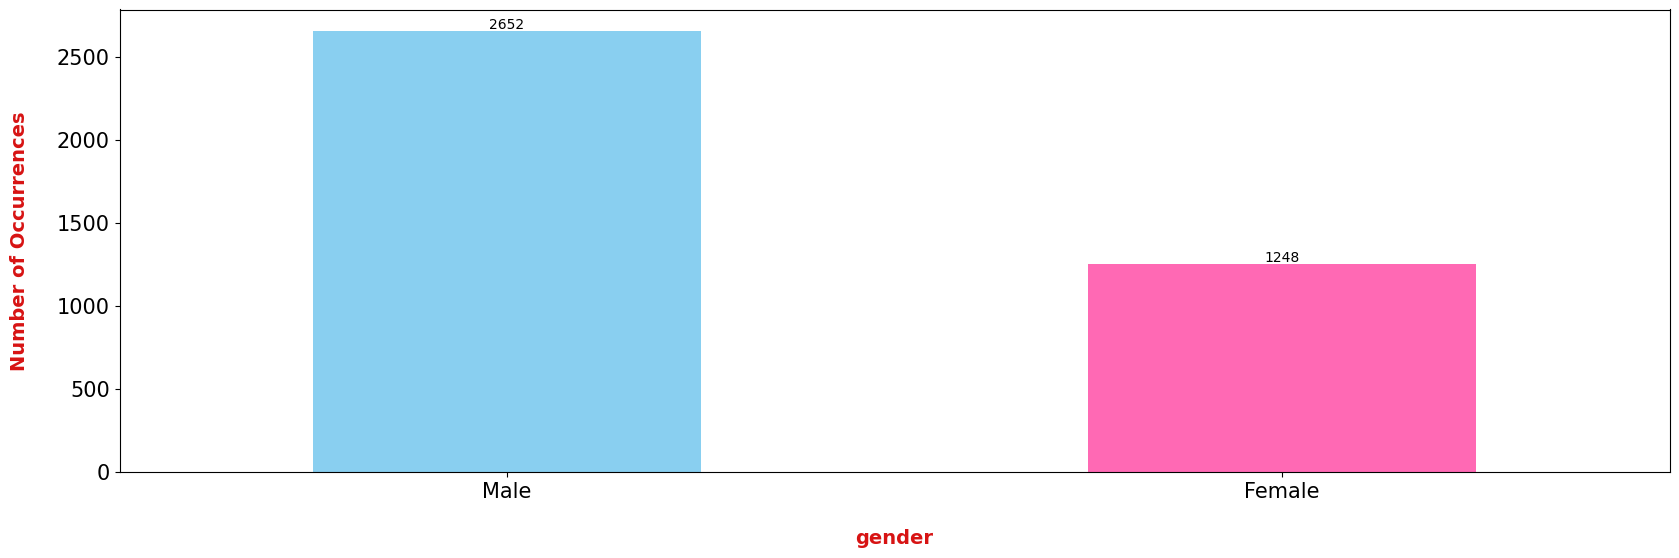

In [ ]:
plt.figure(figsize = (20, 6))
ax = task_df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('gender', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

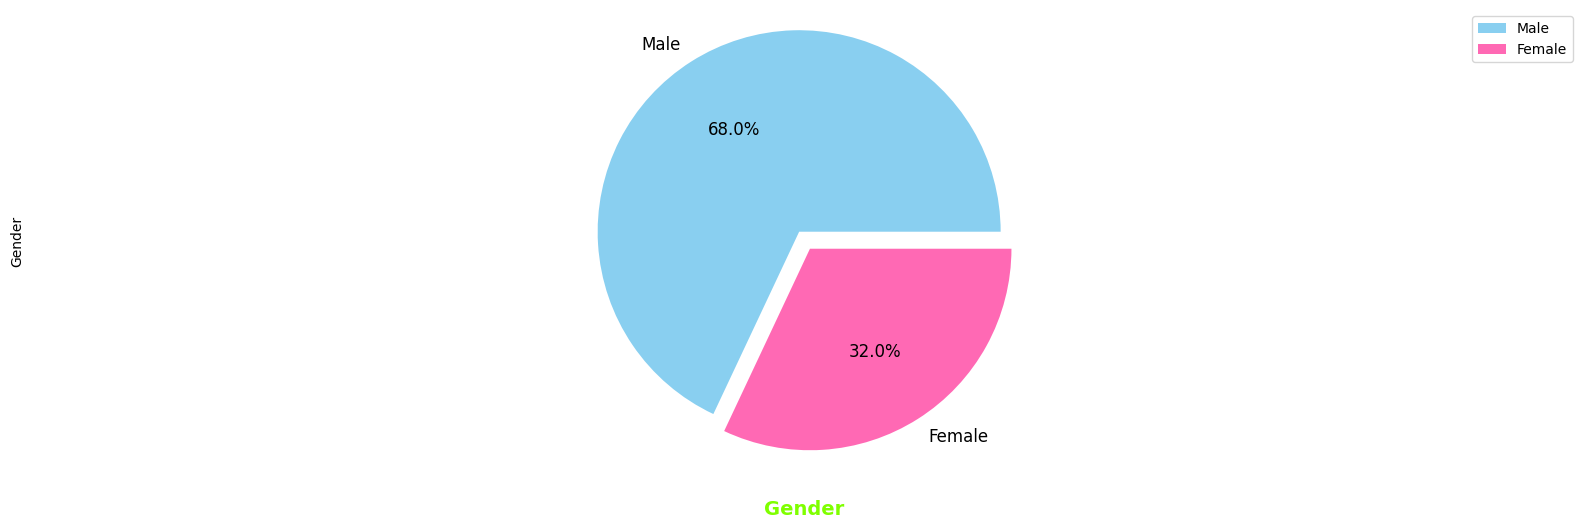

In [ ]:
plt.figure(figsize = (20, 6))

counts = task_df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#7FFF00", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [ ]:
task_df.isnull().sum()

Customer ID                   0
Age                         631
Gender                        0
Item Purchased                0
Category                      0
Purchase Amount (USD)       615
Location                      0
Size                          0
Color                         0
Season                        0
Review Rating               654
Subscription Status           0
Payment Method                0
Shipping Type                 0
Discount Applied              0
Promo Code Used               0
Previous Purchases            0
Preferred Payment Method      0
Frequency of Purchases        0
dtype: int64

### Checking NULL values

In [ ]:
task_df.isnull().sum()

Customer ID                   0
Age                         631
Gender                        0
Item Purchased                0
Category                      0
Purchase Amount (USD)       615
Location                      0
Size                          0
Color                         0
Season                        0
Review Rating               654
Subscription Status           0
Payment Method                0
Shipping Type                 0
Discount Applied              0
Promo Code Used               0
Previous Purchases            0
Preferred Payment Method      0
Frequency of Purchases        0
dtype: int64

we are checking the total no of null values in respective columns